# Аппроксимация зависимости окон в расписании (в часах) от веса

In [98]:
from BinPackingWEEK import BinPacking
import matplotlib.pyplot as plt
import xlrd
import math
import json
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, lagrange
from scipy.optimize import curve_fit

In [36]:
df = pd.read_excel("BURDENKODATA.xlsm")
#df = df.dropna()

In [37]:
df['EXAMPLE 1'] = df['ВЕС']

In [38]:
df['Окна.0'] = df['Окна']

## Интерполяция Лагранжа

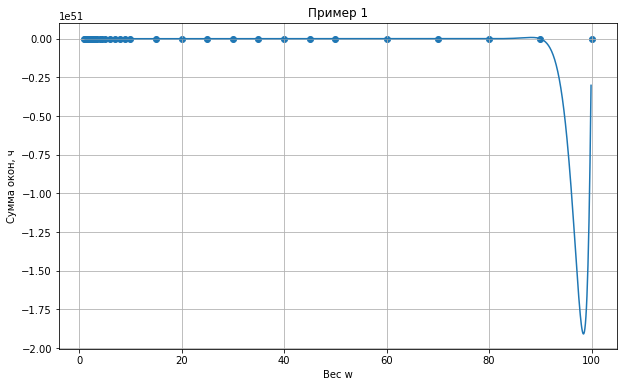

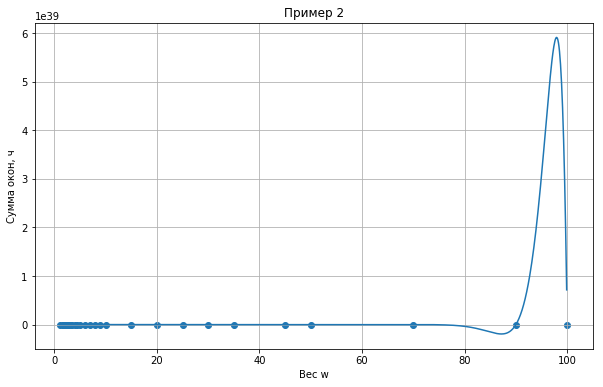

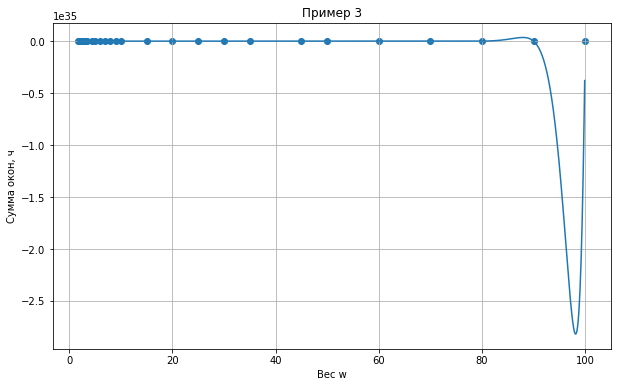

In [99]:
def interpolation_plot(n):
    tdf = df[['EXAMPLE %s' % (n+1), 'Окна.%s' % n]].copy()
    tdf.dropna(inplace=True)
    x = tdf['EXAMPLE %s' % (n+1)]
    y = tdf['Окна.%s' % n]
    poly = lagrange(list(x), list(y))
    fig = plt.figure(figsize=(10,6))
    plt.title("Пример %s" % (n+1))
    plt.scatter(x, y)
    plt.plot(np.arange(x.tolist()[0], 100, 0.1), poly(np.arange(x.tolist()[0], 100, 0.1)))
    plt.xlabel("Вес w")
    plt.ylabel("Сумма окон, ч")
    plt.grid()
    plt.show()
for n in range(3): interpolation_plot(n)

## Интерполяция квадратичными сплайнами

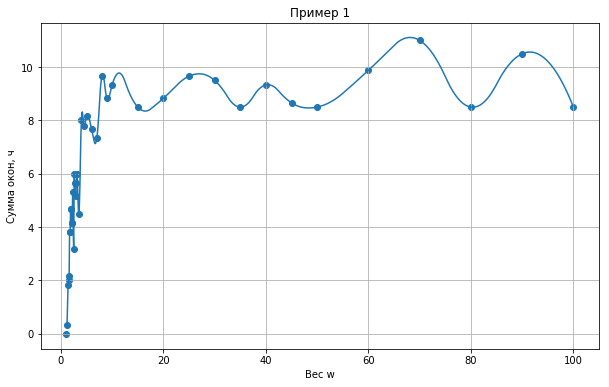

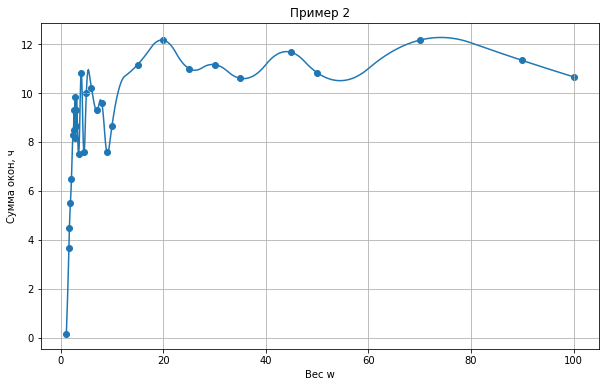

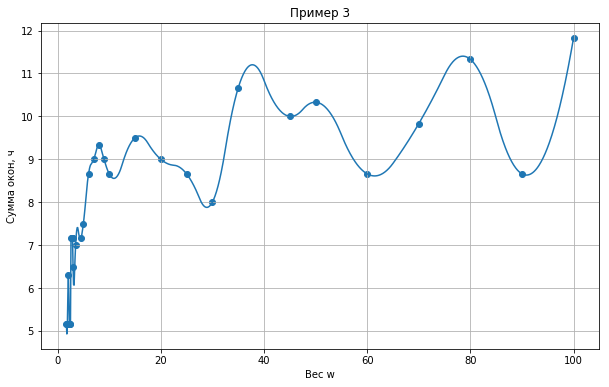

In [96]:
def interpolation_plot(n):
    tdf = df[['EXAMPLE %s' % (n+1), 'Окна.%s' % n]].copy()
    tdf.dropna(inplace=True)
    x = tdf['EXAMPLE %s' % (n+1)]
    y = tdf['Окна.%s' % n]
    poly = interp1d(list(x), list(y), kind='quadratic')
    fig = plt.figure(figsize=(10,6))
    plt.title("Пример %s" % (n+1))
    plt.scatter(x, y)
    plt.plot(np.arange(x.tolist()[0], 100, 0.1), poly(np.arange(x.tolist()[0], 100, 0.1)))
    plt.xlabel("Вес w")
    plt.ylabel("Сумма окон, ч")
    plt.grid()
    plt.show()
for n in range(3): interpolation_plot(n)

## Интерполяция кубическими сплайнами

In [94]:
def interpolation_plot(n):
    tdf = df[['EXAMPLE %s' % (n+1), 'Окна.%s' % n]].copy()
    tdf.dropna(inplace=True)
    x = tdf['EXAMPLE %s' % (n+1)]
    y = tdf['Окна.%s' % n]
    poly = interp1d(list(x), list(y), kind='cubic')
    fig = plt.figure(figsize=(10,6))
    plt.title("Пример %s" % (n+1))
    plt.scatter(x, y)
    plt.plot(np.arange(x.tolist()[0], 100, 0.1), poly(np.arange(x.tolist()[0], 100, 0.1)))
    plt.xlabel("Вес w")
    plt.ylabel("Сумма окон, ч")
    plt.grid()
    plt.show()

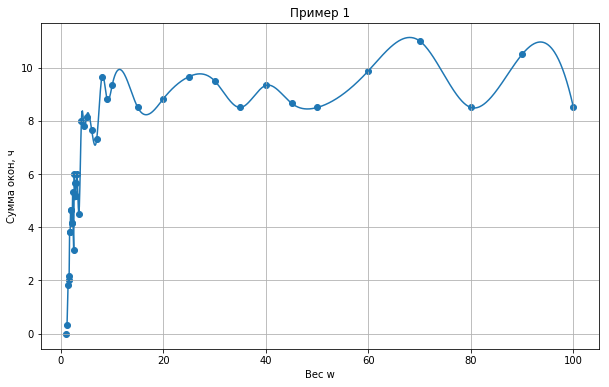

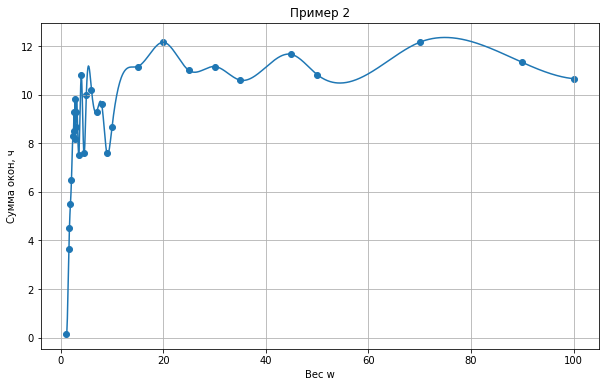

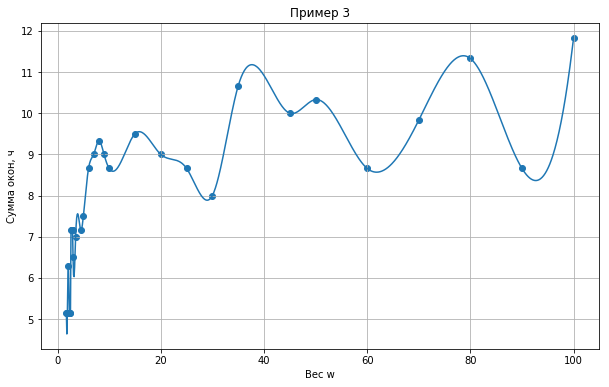

In [95]:
for n in range(3): interpolation_plot(n)

## Аппроксимация логарифмической зависимостью

In [79]:
def f(x, a, b, c, intercept):
    return np.multiply(a, np.log(np.multiply(b,x)+c)) + intercept

In [92]:
def interpolation_plot(n):
    tdf = df[['EXAMPLE %s' % (n+1), 'Окна.%s' % n]].copy()
    tdf.dropna(inplace=True)
    x = tdf['EXAMPLE %s' % (n+1)]
    y = tdf['Окна.%s' % n]
    popt, pcov = curve_fit(f, x, y)
    perr = np.sqrt(np.diag(pcov))
    fig = plt.figure(figsize=(10,6))
    plt.title("Пример %s (отн. погрешность аппорксимации: %.2f %%)" % (n+1, 100*perr[0]/popt[0]))
    plt.scatter(x, y)
    plt.plot(np.arange(0, 100, 0.1), f(np.arange(0, 100, 0.1), *popt))
    plt.xlabel("Вес w")
    plt.ylabel("Сумма окон, ч")
    plt.grid()
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


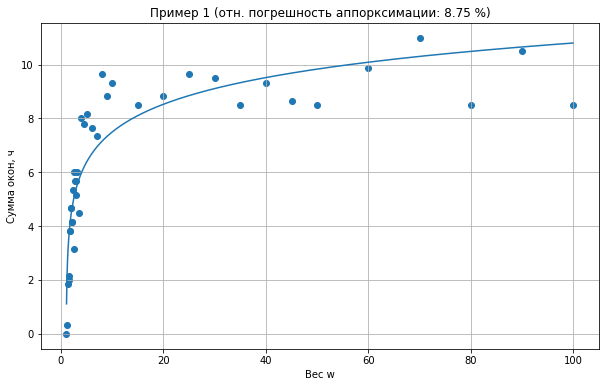

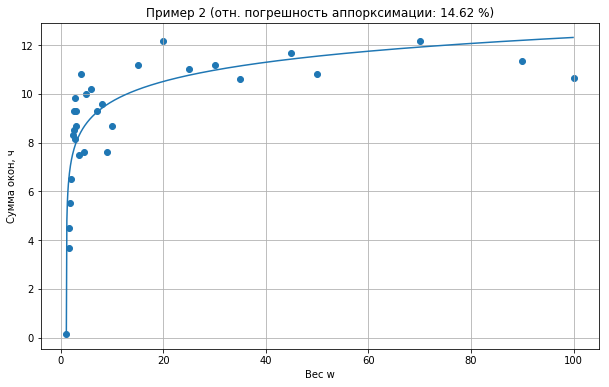

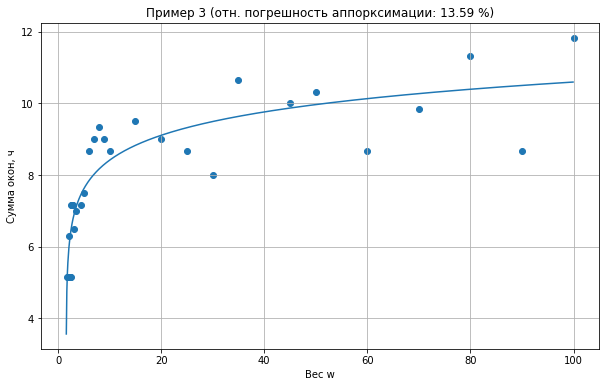

In [93]:
for n in range(3): interpolation_plot(n)

In [ ]:
"""
dft = df.dropna(how='all').copy()
tdf = df[['ВЕС', 'Окна.0']].copy()
tdf.dropna(inplace=True)
x = tdf['ВЕС']
y = tdf['Окна.0']
res = []
popt, pcov = curve_fit(f, x, y)
for c, d in enumerate(dft['Окна.0']): 
    w = dft['ВЕС'].tolist()
    if not (d > 0):      # element is nan
        res.append(f(w[c], *popt))
    else:
        res.append(d)
"""

# Итоги и выводы
- Интерполяция, судя по расположению точек, не позволяет адекватно оценить значения длины окон в часах для пропущенных точек
- Аппроксимация логарифмической зависимостью показывает более хорошие результаты, но тем не менее не является достаточно точной для заполнения таблицы
- **Вопрос:** какую из аппроксимаций (см. графики) лучше использовать?
- **Предложение:** значение суммы окон растёт по сложной зависимости от роста веса. Но раньше было показано, что зависимость значения цф от веса похожа на линейную. Вероятно, стоит интерполировать не количество окон, а именно значения целевой функции? В чём проблемы этого подхода?